In [18]:
from keras import models
from keras import layers
from keras import optimizers

In [19]:
from keras.datasets import cifar10
import numpy as np

In [20]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

In [5]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

In [21]:
train_images = train_images.reshape((50000,32*32*3))
test_images =  test_images.reshape((10000,32*32*3))
train_images = train_images[np.where(np.isin(train_labels,[0,1,2]))[0]]
train_labels = train_labels[np.isin(train_labels,[0,1,2])]

test_images = test_images[np.where(np.isin(test_labels,[0,1,2]))[0]]
test_labels = test_labels[np.isin(test_labels,[0,1,2])]

In [8]:
train_images.shape
train_labels.shape

(15000,)

In [22]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [23]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
train_images.shape,train_labels.shape

((15000, 3072), (15000, 3))

In [12]:
train_images[0],train_labels[0]

(array([0.6666667 , 0.7058824 , 0.7764706 , ..., 0.28627452, 0.3019608 ,
        0.3137255 ], dtype=float32), array([0., 1., 0.], dtype=float32))

In [43]:
model = models.Sequential()
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation='relu', input_shape=(3072,)))

In [44]:
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='relu'))

In [356]:
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(64,activation='relu'))

In [45]:
model.add(layers.Dense(3,activation='softmax'))

In [46]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
train_x = train_images[12000:]
val_x = train_images[:12000]

train_y = train_labels[12000:]
val_y = train_labels[:12000]

In [47]:
train_x.shape,train_y.shape
val_x.shape, val_y.shape

((12000, 3072), (12000, 3))

In [48]:
history = model.fit(train_x,train_y,epochs=200,batch_size=512,validation_data=(val_x,val_y))

Train on 3000 samples, validate on 12000 samples
Epoch 1/200
3000/3000 [==============================] - 0s 136us/step - loss: 1.1433 - accuracy: 0.3910 - val_loss: 1.0451 - val_accuracy: 0.4303
Epoch 2/200
3000/3000 [==============================] - 0s 137us/step - loss: 1.0211 - accuracy: 0.4947 - val_loss: 0.9859 - val_accuracy: 0.5642
Epoch 3/200
3000/3000 [==============================] - 0s 111us/step - loss: 1.0099 - accuracy: 0.4993 - val_loss: 0.9663 - val_accuracy: 0.5928
Epoch 4/200
3000/3000 [==============================] - 0s 107us/step - loss: 0.9742 - accuracy: 0.5480 - val_loss: 1.0084 - val_accuracy: 0.5568
Epoch 5/200
3000/3000 [==============================] - 0s 108us/step - loss: 0.9473 - accuracy: 0.5857 - val_loss: 0.9236 - val_accuracy: 0.5845
Epoch 6/200
3000/3000 [==============================] - 0s 107us/step - loss: 0.9312 - accuracy: 0.5710 - val_loss: 0.9648 - val_accuracy: 0.5047
Epoch 7/200
3000/3000 [==============================] - 0s 132us/ste

3000/3000 [==============================] - 0s 108us/step - loss: 0.7156 - accuracy: 0.7083 - val_loss: 0.7113 - val_accuracy: 0.7162
Epoch 57/200
3000/3000 [==============================] - 0s 105us/step - loss: 0.6852 - accuracy: 0.7323 - val_loss: 0.7734 - val_accuracy: 0.6707
Epoch 58/200
3000/3000 [==============================] - 0s 105us/step - loss: 0.7151 - accuracy: 0.7103 - val_loss: 0.7274 - val_accuracy: 0.7004
Epoch 59/200
3000/3000 [==============================] - 0s 105us/step - loss: 0.7053 - accuracy: 0.7113 - val_loss: 0.7152 - val_accuracy: 0.7141
Epoch 60/200
3000/3000 [==============================] - 0s 105us/step - loss: 0.6977 - accuracy: 0.7233 - val_loss: 0.7148 - val_accuracy: 0.7063
Epoch 61/200
3000/3000 [==============================] - 0s 112us/step - loss: 0.6813 - accuracy: 0.7337 - val_loss: 0.8211 - val_accuracy: 0.6423
Epoch 62/200
3000/3000 [==============================] - 0s 104us/step - loss: 0.7220 - accuracy: 0.7007 - val_loss: 0.7370 

3000/3000 [==============================] - 0s 149us/step - loss: 0.6096 - accuracy: 0.7623 - val_loss: 0.6639 - val_accuracy: 0.7260
Epoch 112/200
3000/3000 [==============================] - 0s 147us/step - loss: 0.6083 - accuracy: 0.7593 - val_loss: 0.6529 - val_accuracy: 0.7398
Epoch 113/200
3000/3000 [==============================] - 0s 153us/step - loss: 0.6039 - accuracy: 0.7663 - val_loss: 0.6644 - val_accuracy: 0.7312
Epoch 114/200
3000/3000 [==============================] - 0s 149us/step - loss: 0.5971 - accuracy: 0.7667 - val_loss: 0.6986 - val_accuracy: 0.7032
Epoch 115/200
3000/3000 [==============================] - 0s 153us/step - loss: 0.6268 - accuracy: 0.7467 - val_loss: 0.6449 - val_accuracy: 0.7422
Epoch 116/200
3000/3000 [==============================] - 0s 145us/step - loss: 0.5739 - accuracy: 0.7840 - val_loss: 0.6698 - val_accuracy: 0.7246
Epoch 117/200
3000/3000 [==============================] - 0s 127us/step - loss: 0.6053 - accuracy: 0.7723 - val_loss: 0

3000/3000 [==============================] - 0s 100us/step - loss: 0.5432 - accuracy: 0.7870 - val_loss: 0.6292 - val_accuracy: 0.7463
Epoch 167/200
3000/3000 [==============================] - 0s 103us/step - loss: 0.5396 - accuracy: 0.7860 - val_loss: 0.6329 - val_accuracy: 0.7443
Epoch 168/200
3000/3000 [==============================] - 0s 100us/step - loss: 0.5291 - accuracy: 0.7913 - val_loss: 0.6578 - val_accuracy: 0.7318
Epoch 169/200
3000/3000 [==============================] - 0s 100us/step - loss: 0.5185 - accuracy: 0.8070 - val_loss: 0.6240 - val_accuracy: 0.7474
Epoch 170/200
3000/3000 [==============================] - 0s 105us/step - loss: 0.5326 - accuracy: 0.7937 - val_loss: 0.6318 - val_accuracy: 0.7475
Epoch 171/200
3000/3000 [==============================] - 0s 100us/step - loss: 0.5549 - accuracy: 0.7790 - val_loss: 0.6511 - val_accuracy: 0.7371
Epoch 172/200
3000/3000 [==============================] - 0s 100us/step - loss: 0.5200 - accuracy: 0.8070 - val_loss: 0

In [49]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

In [38]:
history_dict['val_loss']

[1.0535058743158976,
 1.0566670564015705,
 0.9995547078450521,
 0.9534237090746561,
 0.9851479946772258,
 0.9165970230102539,
 0.8990827536582947,
 0.8939194334348043,
 0.9138472593625386,
 0.8808958299954732,
 0.8634463109970093,
 0.8714936623573303,
 0.8375788327852884,
 0.8909678190549215,
 0.8454655380249023,
 0.8730955971082052,
 0.8123917759259541,
 0.8795992283821106,
 0.8370731811523437,
 0.7956882592837016,
 0.8430065857569377,
 0.7999757259686788,
 0.7970205710728964,
 0.7824677135149638,
 0.7765697385470073,
 0.779567152818044,
 0.7728172787030538,
 0.7937633136113484,
 0.7742196035385132,
 0.7969537916183471,
 0.7685474081039428,
 0.7974755625724792,
 0.7618638564745586,
 0.8180900055567424,
 0.7456971834500631,
 0.7567289102872212,
 0.7557169950803121,
 0.75430277744929,
 0.7617056635220846,
 0.8035147550900777,
 0.820515609741211,
 0.7447608491579691,
 0.7837232651710511,
 0.7404075376192729,
 0.7525609464645385,
 0.731690142472585,
 0.7651057683626811,
 0.738282152970631

In [36]:
history_dict['accuracy']

[0.36433333,
 0.44666666,
 0.52033335,
 0.544,
 0.608,
 0.55833334,
 0.629,
 0.6303333,
 0.615,
 0.642,
 0.62866664,
 0.65466666,
 0.62233335,
 0.6663333,
 0.6333333,
 0.67333335,
 0.6533333,
 0.66,
 0.68366665,
 0.6536667,
 0.6756667,
 0.666,
 0.682,
 0.679,
 0.68633336,
 0.6766667,
 0.6943333,
 0.67866665,
 0.6793333,
 0.68666667,
 0.6856667,
 0.68233335,
 0.6906667,
 0.6896667,
 0.71566665,
 0.686,
 0.6903333,
 0.7133333,
 0.698,
 0.6856667,
 0.71966666,
 0.69666666,
 0.693,
 0.71466666,
 0.702,
 0.722,
 0.71033335,
 0.7043333,
 0.716,
 0.7183333,
 0.71433336,
 0.72066665,
 0.7183333,
 0.7076667,
 0.73466665,
 0.715,
 0.731,
 0.716,
 0.73933333,
 0.711,
 0.722,
 0.72566664,
 0.715,
 0.73933333,
 0.70066667,
 0.73433334,
 0.72966665,
 0.73233336,
 0.733,
 0.72866666,
 0.72066665,
 0.739,
 0.73866665,
 0.717,
 0.74333334,
 0.738,
 0.7303333,
 0.73966664,
 0.754,
 0.719,
 0.7416667,
 0.74766666,
 0.72966665,
 0.759,
 0.7456667,
 0.73733336,
 0.74666667,
 0.73466665,
 0.753,
 0.74633336

In [53]:
history_dict['val_accuracy']

[0.43033334612846375,
 0.5642499923706055,
 0.5928333401679993,
 0.5568333268165588,
 0.5845000147819519,
 0.5046666860580444,
 0.6549166440963745,
 0.6254166960716248,
 0.6423333287239075,
 0.6230833530426025,
 0.6469166874885559,
 0.6600833535194397,
 0.6471666693687439,
 0.5895000100135803,
 0.6495000123977661,
 0.6693333387374878,
 0.6811666488647461,
 0.6261666417121887,
 0.67208331823349,
 0.6684166789054871,
 0.6795833110809326,
 0.6940833330154419,
 0.6597499847412109,
 0.6735000014305115,
 0.6827499866485596,
 0.6566666960716248,
 0.6790000200271606,
 0.6757500171661377,
 0.6494166851043701,
 0.6897500157356262,
 0.6918333172798157,
 0.621833324432373,
 0.6983333230018616,
 0.6889166831970215,
 0.6897500157356262,
 0.7055833339691162,
 0.6782500147819519,
 0.7026666402816772,
 0.6066666841506958,
 0.6859166622161865,
 0.7014999985694885,
 0.7039166688919067,
 0.6966666579246521,
 0.706333339214325,
 0.6926666498184204,
 0.6869166493415833,
 0.671583354473114,
 0.71241664886474

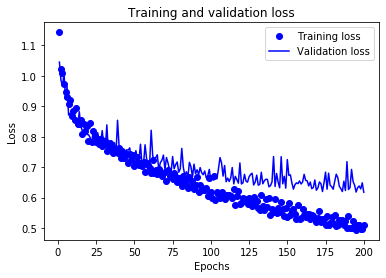

In [50]:
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs, val_loss_values,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

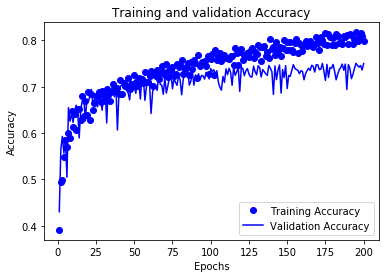

In [52]:
plt.plot(epochs,acc_values,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show(
)

In [54]:
model = models.Sequential()
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation='relu', input_shape=(3072,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=128,batch_size=512)

Epoch 1/128
15000/15000 [==============================] - 1s 41us/step - loss: 0.9977 - accuracy: 0.5200
Epoch 2/128
15000/15000 [==============================] - 1s 41us/step - loss: 0.8880 - accuracy: 0.6191
Epoch 3/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.8416 - accuracy: 0.6495
Epoch 4/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.8141 - accuracy: 0.6610
Epoch 5/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.7851 - accuracy: 0.6739
Epoch 6/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.7741 - accuracy: 0.6781
Epoch 7/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.7587 - accuracy: 0.6907
Epoch 8/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.7468 - accuracy: 0.6915
Epoch 9/128
15000/15000 [==============================] - 1s 37us/step - loss: 0.7305 - accuracy: 0.7007
Epoch 10/128
15000/15000 [====================

15000/15000 [==============================] - 1s 37us/step - loss: 0.5039 - accuracy: 0.8003
Epoch 78/128
15000/15000 [==============================] - 1s 35us/step - loss: 0.5030 - accuracy: 0.8022
Epoch 79/128
15000/15000 [==============================] - 1s 35us/step - loss: 0.4984 - accuracy: 0.8039
Epoch 80/128
15000/15000 [==============================] - 1s 35us/step - loss: 0.5023 - accuracy: 0.7994
Epoch 81/128
15000/15000 [==============================] - 1s 35us/step - loss: 0.4978 - accuracy: 0.8019
Epoch 82/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.4969 - accuracy: 0.8043
Epoch 83/128
15000/15000 [==============================] - 1s 36us/step - loss: 0.4963 - accuracy: 0.8024
Epoch 84/128
15000/15000 [==============================] - 1s 35us/step - loss: 0.4934 - accuracy: 0.8031
Epoch 85/128
15000/15000 [==============================] - 1s 35us/step - loss: 0.4969 - accuracy: 0.7995
Epoch 86/128
15000/15000 [========================

In [55]:
model.evaluate(test_images,test_labels)

3000/3000 [==============================] - 0s 49us/step


[0.5269214574495952, 0.7929999828338623]

In [57]:
model.save(r"D:\Data Science\deep learning\assignment-1\Q1-model-128.h5")